### Import Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN, LSTM, GRU
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tcn import TCN
from keras.preprocessing.sequence import TimeseriesGenerator
import time

### Load data

In [32]:
df = pd.read_csv(r"D:\Nh\Solar_2\Thang\Total_Solar_Energy_Forecasting\data\solarenergy.csv", index_col= "Datetime")
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_24304\3619369096.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Nh\Solar_2\Thang\Total_Solar_Energy_Forecasting\data\solarenergy.csv", index_col= "Datetime")


,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...
01/05/2007 5:00,6445,NaN,NaN,NaN,NaN,NaN,NaN
01/05/2007 4:00,6452,NaN,NaN,NaN,NaN,NaN,NaN
01/05/2007 3:00,6583,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116117 entries, 03/08/2020 0:00 to 01/05/2007 1:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   solar_mw                     116117 non-null  int64  
 1   wind-direction               2920 non-null    object 
 2   wind-speed                   2920 non-null    float64
 3   humidity                     2920 non-null    float64
 4   average-wind-speed-(period)  2919 non-null    float64
 5   average-pressure-(period)    2920 non-null    float64
 6   temperature                  2920 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.1+ MB


In [34]:
df1 = df.copy()
df1 = df1.iloc[:2920]
df1.index = pd.to_datetime(df1.index, format='%d/%m/%Y %H:%M')
df1

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385,27,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390,27,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312,27,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832,27,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...
2020-04-03 13:00:00,10396,NaN,13.9,75.0,10.0,29.93,63.0
2020-04-03 12:00:00,10763,NaN,13.9,66.0,15.0,29.91,63.0
2020-04-03 11:00:00,11048,NaN,13.9,68.0,21.0,29.88,63.0


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2020-08-03 00:00:00 to 2020-04-03 09:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   solar_mw                     2920 non-null   int64  
 1   wind-direction               2207 non-null   object 
 2   wind-speed                   2920 non-null   float64
 3   humidity                     2920 non-null   float64
 4   average-wind-speed-(period)  2919 non-null   float64
 5   average-pressure-(period)    2920 non-null   float64
 6   temperature                  2920 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 182.5+ KB


### Exploratory Data Analysis

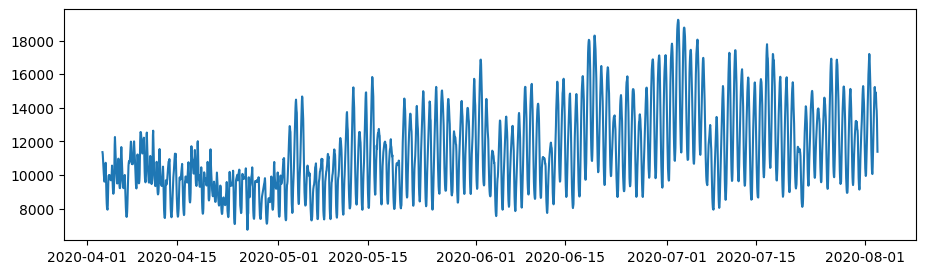

In [36]:
fig, ax = plt.subplots(figsize= (11, 3))
x = df1.index
y = df1["solar_mw"]
plt.plot(x, y)

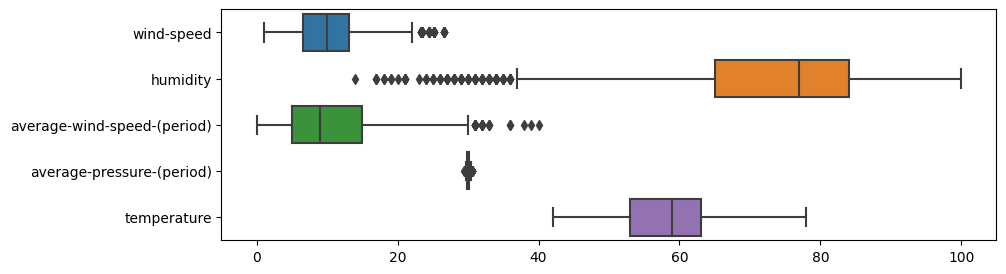

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.boxplot(data=df1.drop("solar_mw", axis=1), orient='h')
plt.show()


### Preprocessing Data

* Handle Missing Data

In [38]:
df2 = df1.copy()

In [39]:
df2["solar_mw"] = df2["solar_mw"].astype("float")

In [40]:
freq = df2["wind-direction"].mode()[0]
df2["wind-direction"].replace("am", freq, inplace=True)
df2["wind-direction"] = df2["wind-direction"].astype("float")
df2["wind-direction"].fillna(df2["wind-direction"].median(), inplace= True)
df2["average-wind-speed-(period)"].fillna(df2["average-wind-speed-(period)"].median(), inplace= True)


In [67]:
df2.to_csv(r'D:\Nh\Solar_2\Thang\Total_Solar_Energy_Forecasting\data\solar.csv')

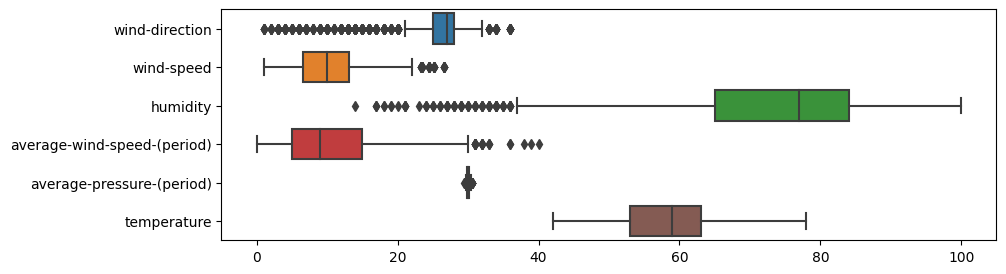

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.boxplot(data=df2.drop("solar_mw", axis=1), orient='h')
plt.show()


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2020-08-03 00:00:00 to 2020-04-03 09:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   solar_mw                     2920 non-null   float64
 1   wind-direction               2920 non-null   float64
 2   wind-speed                   2920 non-null   float64
 3   humidity                     2920 non-null   float64
 4   average-wind-speed-(period)  2920 non-null   float64
 5   average-pressure-(period)    2920 non-null   float64
 6   temperature                  2920 non-null   float64
dtypes: float64(7)
memory usage: 182.5 KB


* Train/Test Split

In [43]:
test_size = int(0.2 * len(df2))
val_size = int(0.5 * test_size)
train_df = df2.iloc[test_size:]
tmp_df = df2.iloc[:test_size]
val_df = tmp_df.iloc[val_size:]
test_df = tmp_df.iloc[:val_size]


In [44]:
train_df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-07-09 16:00:00,14548.0,22.0,6.0,93.0,0.0,30.23,60.0
2020-07-09 15:00:00,13932.0,29.0,6.0,96.0,0.0,30.22,60.0
2020-07-09 14:00:00,13317.0,29.0,6.0,96.0,0.0,30.22,60.0
2020-07-09 13:00:00,12668.0,29.0,6.0,93.0,5.0,30.23,60.0
2020-07-09 12:00:00,12120.0,29.0,6.0,63.0,9.0,30.16,60.0
...,...,...,...,...,...,...,...
2020-04-03 13:00:00,10396.0,27.0,13.9,75.0,10.0,29.93,63.0
2020-04-03 12:00:00,10763.0,27.0,13.9,66.0,15.0,29.91,63.0
2020-04-03 11:00:00,11048.0,27.0,13.9,68.0,21.0,29.88,63.0


In [45]:
val_df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-07-21 20:00:00,11422.0,26.0,10.2,71.0,3.0,30.11,65.0
2020-07-21 19:00:00,11535.0,26.0,10.2,55.0,22.0,30.07,65.0
2020-07-21 18:00:00,11561.0,26.0,10.2,73.0,16.0,30.06,65.0
2020-07-21 17:00:00,11470.0,26.0,10.2,81.0,11.0,30.05,65.0
2020-07-21 16:00:00,11375.0,26.0,12.6,84.0,7.0,30.03,66.0
...,...,...,...,...,...,...,...
2020-07-09 21:00:00,13848.0,22.0,5.9,87.0,5.0,30.32,60.0
2020-07-09 20:00:00,14671.0,22.0,5.9,84.0,3.0,30.26,60.0
2020-07-09 19:00:00,15158.0,22.0,5.9,87.0,16.0,30.21,60.0


In [46]:
test_df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385.0,27.0,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390.0,27.0,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312.0,27.0,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832.0,27.0,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038.0,27.0,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...
2020-07-22 01:00:00,9092.0,17.0,10.5,93.0,21.0,30.10,66.0
2020-07-22 00:00:00,9761.0,26.0,10.2,93.0,14.0,30.12,65.0
2020-07-21 23:00:00,10528.0,26.0,10.2,96.0,7.0,30.12,65.0


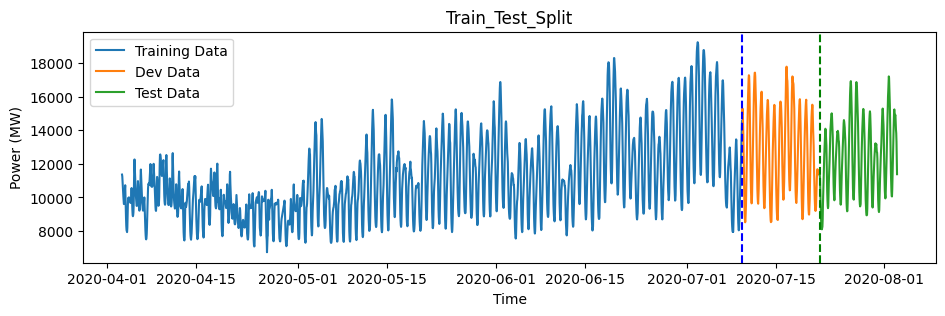

In [47]:
# Tạo hình và trục
fig, ax = plt.subplots(figsize=(11, 3))

# Dữ liệu của tập huấn luyện
x1 = train_df.index
y1 = train_df["solar_mw"]

# Dữ liệu của tập dev
x2 = val_df.index
y2 = val_df["solar_mw"]

# Dữ liệu của tập test
x3 = test_df.index
y3 = test_df["solar_mw"]

# Vẽ biểu đồ cho dữ liệu tập huấn luyện và tập kiểm tra
ax.plot(x1, y1, label='Training Data')
ax.plot(x2, y2, label='Dev Data')
ax.plot(x3, y3, label='Test Data')
ax.axvline(train_df.index[0], color= "blue", ls= "--")
ax.axvline(val_df.index[0], color= "green", ls= "--")

# Đặt tiêu đề và nhãn trục
ax.set_title('Train_Test_Split')
ax.set_xlabel('Time')
ax.set_ylabel('Power (MW)')

# Thêm chú thích cho biểu đồ
ax.legend()

# Hiển thị biểu đồ
plt.show()


* Normalization Data

In [48]:
x_train = train_df.drop("solar_mw", axis= 1)
y_train = train_df["solar_mw"]
x_test = test_df.drop("solar_mw", axis= 1)
y_test = test_df["solar_mw"]
x_val = val_df.drop("solar_mw", axis= 1)
y_val = val_df["solar_mw"]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((2336, 6), (2336,), (292, 6), (292,), (292, 6), (292,))

In [49]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)

In [50]:
sc_train = MinMaxScaler()
# sc_test = MinMaxScaler()

sc_train.fit(x_train)
x_train = sc_train.transform(x_train)
x_test = sc_train.transform(x_test)
x_val = sc_train.transform(x_val)

# sc_test.fit(y_train)
# y_train = sc_test.transform(y_train)
# y_test = sc_test.transform(y_test)
# y_val = sc_test.transform(y_val)

### Model

In [51]:
def parameters(test, predict, filename, time_step, total_time):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    r_squared = r2_score(test, predict)
    print(f'R-squared (R²) Score: {r_squared}')
    # with open(r'F:\Code\solar\r2_score_result.txt', 'a') as file:
    #     file.write(f"R2_Score_{lengths}: {r2_result}\n")
    mse = mean_squared_error(test, predict)
    print(f'Mean Squared Error (MSE): {mse}')
    rmse = mean_squared_error(test, predict, squared=False)
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    mae = mean_absolute_error(test, predict)
    print(f'Mean Absolute Error (MAE): {mae}')
    with open(filename, 'a') as file:
        file.write(f'\nTime_step: {time_step}')
        file.write(f'R-squared (R²) Score: {r_squared}\n')
        file.write(f'Mean Squared Error (MSE): {mse}\n')
        file.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
        file.write(f'Mean Absolute Error (MAE): {mae}\n')
        file.write(f'Total Training Time:{total_time}\n')
        file.write('**************\n')
    
def data_plot(test, predict, name_model, image_path, num_plot = 72):
    plt.figure(figsize=(12,6), dpi=300)
    plt.plot(test,  label='Actual Data', color = 'red')
    plt.plot(predict, alpha = 0.6, label='Predicted Data', color = 'green')
    plt.legend(loc='upper right')
    plt.savefig(f'{path}{name_model}_full.png')

    plt.figure(figsize=(6,4), dpi=300)
    plt.plot(test[:num_plot], label='Actual Data', color = 'red')
    plt.plot(predict[:num_plot], label='Predicted Data', alpha=0.7, color = 'green')
    plt.legend(loc='upper right')
    plt.xlim(0, num_plot - 1)
    plt.savefig(f'{image_path}{name_model}_{num_plot}h.png')
    plt.show()

def set_index(dff, size_val, time_step):
    df_reset = dff.reset_index()
    index = df_reset.iloc[:,0]
    index_test = index[size_val+ time_step:]
    index_test = index_test.to_frame()
    index_test.reset_index(drop=True, inplace=True)
    return index_test

# def inverse(G_test, lengths, n_features, model, scaler, index_test):
#     predictions = []
#     predictions = np.zeros((len(G_test), 2))  # 2 columns for Actual and Prediction
#     # Iterate over G_test to get predictions
#     for i, (x, y) in enumerate(G_test):
#         x_input = np.array(x).reshape((1, lengths, n_features))
#         yhat = model.predict(x_input, verbose=0)
#         # Store Actual and Prediction in the array
#         predictions[i] = [scaler.inverse_transform(y)[0][0], scaler.inverse_transform(yhat)[0][0]]
#     # Create DataFrame from the array
#     df_result = pd.DataFrame(predictions, columns=['Actual', 'Prediction'])
#     df_result = pd.concat([df_result, index_test], axis = 1)
#     df_result.set_index('Date', inplace=True)
#     return df_result

def inverse2(G_test, lengths, n_features, model, scaler, index_test):
    # model.evaluate(G_test, verbose=0)
    predictions = model.predict(G_test)
    df = pd.concat( [pd.DataFrame(y_test[lengths:,:]) , pd.DataFrame(predictions)], axis = 1)
    df_inverse = scaler.inverse_transform(df)
    df_result = pd.DataFrame(df_inverse, columns = ['Actual', 'Prediction'])
    df_result = pd.concat([df_result, index_test], axis = 1)
    df_result.set_index('Date', inplace=True)
    return df_result 

def replace(df_result, index_test):
    df_result2 = pd.DataFrame()
    df_result2 = pd.concat([df_result, index_test], axis=1)
    df_result2.set_index('Date', inplace=True)
    df_result2.loc[(df_result2.index.hour >= 21) | (df_result2.index.hour < 4), 'Prediction'] = 0
    return df_result2

def loss_plot(history):
    import matplotlib.pyplot as plt
    # In ra đồ thị của hàm loss và val_loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [52]:
# for n_input in range(1,25):
#     n_features =  8
#     lengths = n_input
#     path = "D:/Research/result/"
#     image_path = "D:\Research\image"
#     file_name = "D:/Research/result/result.txt"
#     #TCNN
#     name_model = f'TCn-32-16_16_time-{n_input}'
#     G_train = TimeseriesGenerator(x_train, y_train,length=lengths, batch_size=128)                   
#     G_val = TimeseriesGenerator(x_val, y_val,length=lengths, batch_size=128)                                                                    
#     G_test = TimeseriesGenerator(x_test, y_test,length=lengths, batch_size=8)
                                        
#     model = Sequential()
#     model.add(TCN(nb_filters= 32, input_shape=(n_input, n_features), 
#                     kernel_size=3,
#                     nb_stacks=1,
#                     dilations=[1, 2, 4, 8],
#                     use_layer_norm=True,
#                     dropout_rate=0.01,
#                     kernel_initializer='glorot_uniform', 
#                     return_sequences=True)) #return_sequences=True
#     model.add(TCN(nb_filters=16, 
#                     kernel_size=2,
#                     nb_stacks=1,
#                     dilations=[1, 2, 4],
#                     use_layer_norm=True,
#                     dropout_rate=0.01,
#                     kernel_initializer='glorot_uniform'
#                     ))
#     model.add(Dense(16, activation = 'relu'))
#     model.add(Dropout(0.01))
#     model.add(Dense(1))
#     # model.add(Dense(32, activation = 'relu')
#     model.compile(optimizer=Adam(), loss='mae', metrics=['mse'])

#     start = time.time()
#     history = model.fit(G_train, epochs= 200)
#     model.save(f'{path}{name_model}.h5')
#     end = time.time()
#     total_time = end - start
#     # print(f'Total Training Time: {total_time} seconds')
#     print(model.summary())

#     index_test = set_index(dff, size_val, n_input)
#     df_result = inverse2(G_test, n_input, n_features, model, scaler, index_test)
#     df_result.to_csv(f'pred_{name_model}glorot-uniform_{n_input}.csv', columns=['Prediction'], index=False)
#     parameters(df_result['Actual'], df_result['Prediction'], file_name, n_input, total_time)
#     data_plot(df_result['Actual'], df_result['Prediction'], name_model, image_path)

In [53]:
n_features =  6
n_input = 6
lengths = n_input
path = path = "D:/Nh/Solar_2/Thang/Total_Solar_Energy_Forecasting/result"
file_name = "D:/Nh/Solar_2/Thang/Total_Solar_Energy_Forecasting/result/result.txt"
name_model = f'TCn-32-16_16_time-{n_input}'

G_train = TimeseriesGenerator(x_train, y_train,length=lengths, batch_size=128)                   
G_val = TimeseriesGenerator(x_val, y_val,length=lengths, batch_size=128)                                                                    
G_test = TimeseriesGenerator(x_test, y_test,length=lengths, batch_size=8)
model = Sequential([
    TCN(nb_filters= 32, input_shape=(n_input, n_features), kernel_size=3, nb_stacks=1, dilations=[1, 2, 4, 8], 
        use_layer_norm=True, dropout_rate=0.01, kernel_initializer='glorot_uniform',  return_sequences=True),
        
    TCN(nb_filters=16, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4], 
        use_layer_norm=True, dropout_rate=0.01, kernel_initializer='glorot_uniform'),

    Dense(16, activation= 'relu'),
    Dropout(0.01),
    Dense(1)
])
model.compile(optimizer=Adam(), loss='mae', metrics=['mse'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_2 (TCN)                 (None, 6, 32)             23072     
                                                                 
 tcn_3 (TCN)                 (None, 16)                4400      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 27,761
Trainable params: 27,761
Non-trainable params: 0
_________________________________________________________________


In [55]:
start = time.time()
history = model.fit(G_train, epochs= 150, validation_data= G_val)
model.save(f'{path}{name_model}.h5')
end = time.time()
total_time = end - start
print("total_time: ", total_time)

Epoch 1/150
19/19 [==============================] - 4s 73ms/step - loss: 11106.9150 - mse: 129404152.0000 - val_loss: 12800.5166 - val_mse: 170630096.0000
Epoch 2/150
19/19 [==============================] - 1s 34ms/step - loss: 11103.6699 - mse: 129333592.0000 - val_loss: 12797.8750 - val_mse: 170562496.0000
Epoch 3/150
19/19 [==============================] - 1s 33ms/step - loss: 11100.6250 - mse: 129265896.0000 - val_loss: 12794.4512 - val_mse: 170474832.0000
Epoch 4/150
19/19 [==============================] - 1s 33ms/step - loss: 11097.6162 - mse: 129198600.0000 - val_loss: 12791.8857 - val_mse: 170409200.0000
Epoch 5/150
19/19 [==============================] - 1s 33ms/step - loss: 11094.9971 - mse: 129140096.0000 - val_loss: 12789.2627 - val_mse: 170342064.0000
Epoch 6/150
19/19 [==============================] - 1s 33ms/step - loss: 11092.2354 - mse: 129079224.0000 - val_loss: 12786.2568 - val_mse: 170265216.0000
Epoch 7/150
19/19 [==============================] - 1s 33ms/ste

In [56]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [61]:
index_test = set_index(df1, val_size, n_input)

In [62]:
df_result = inverse2(G_test, n_input, n_features, model, sc_train, index_test)

36/36 [==============================] - 0s 10ms/step


ValueError: operands could not be broadcast together with shapes (286,2) (6,) (286,2) 

In [ ]:
index_test = set_index(dff, size_val, n_input)
df_result = inverse2(G_test, n_input, n_features, model, scaler, index_test)
df_result.to_csv(f'pred_{name_model}glorot-uniform_{n_input}.csv', columns=['Prediction'], index=False)
parameters(df_result['Actual'], df_result['Prediction'], file_name, n_input, total_time)
data_plot(df_result['Actual'], df_result['Prediction'], name_model, image_path)

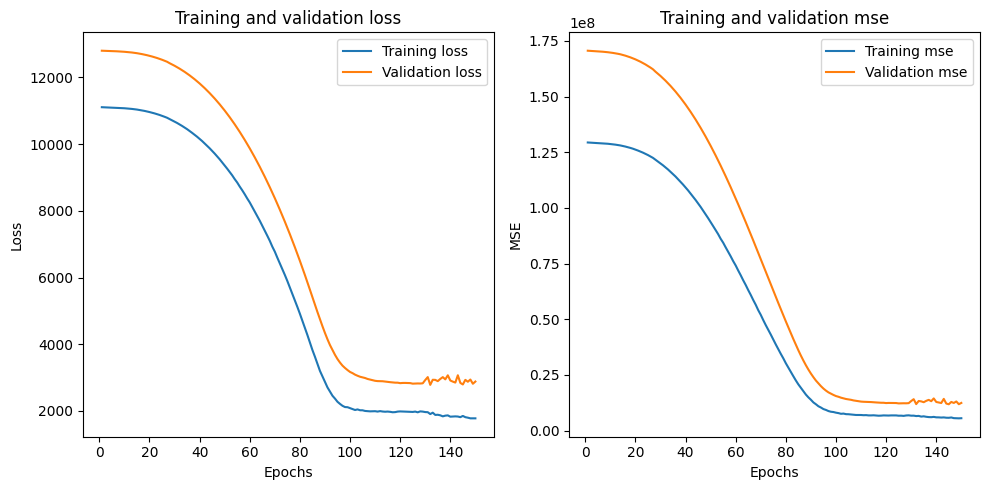

In [57]:
# Lấy giá trị từ history
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']

# Vẽ đồ thị 1: Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Cấu hình subplot với 1 hàng và 2 cột, đồ thị ở vị trí 1
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị 2: MSE
plt.subplot(1, 2, 2)  # Đồ thị ở vị trí 2
plt.plot(epochs, mse,  label='Training mse')
plt.plot(epochs, val_mse,  label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Hiển thị đồ thị
plt.tight_layout()  # Đảm bảo không giao đè văn bản
plt.show()


In [58]:
y_predict = model.predict(G_test)
y_predict.shape

36/36 [==============================] - 1s 9ms/step


(286, 1)

In [59]:
y_test = y_test[lengths:,:]
y_test.shape

(286, 1)

In [60]:
r_squared = r2_score(y_test, y_predict)
print(f'R-squared (R²) Score: {r_squared}')
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error (MSE): {mse}')
rmse = mean_squared_error(y_test, y_predict, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²) Score: -1.5220061475753122
Mean Squared Error (MSE): 12253950.873639036
Root Mean Squared Error (RMSE): 3500.5643650187376
Mean Absolute Error (MAE): 2867.4048329600087
